In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = datasets.load_diabetes()
df['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape


(442, 10)

In [4]:
diabetes_y.shape

(442,)

In [5]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X.shape

(442, 1)

In [6]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [7]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression()

In [8]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [9]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


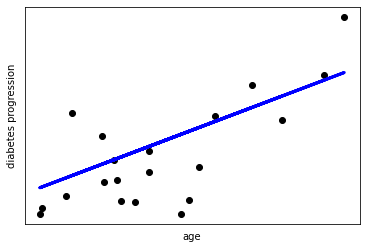

In [10]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
plt.xlabel("age")
plt.ylabel("diabetes progression")
plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X.shape
diabetes_X = diabetes_X[:,[0,2]] 
diabetes_X.shape


(442, 2)

In [12]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


In [13]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression()

In [14]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [15]:
# The coefficients
print("Coefficients: \n", regr.coef_)
print("Intercept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [139.20420118 912.45355549]
Intercept: 
 152.87670001405584
Mean squared error: 2596.60
Coefficient of determination: 0.46


In [16]:
x = diabetes_X_test[:, 0]
y = diabetes_X_test[:, 1]
#z = diabetes_X_test[:, 2]


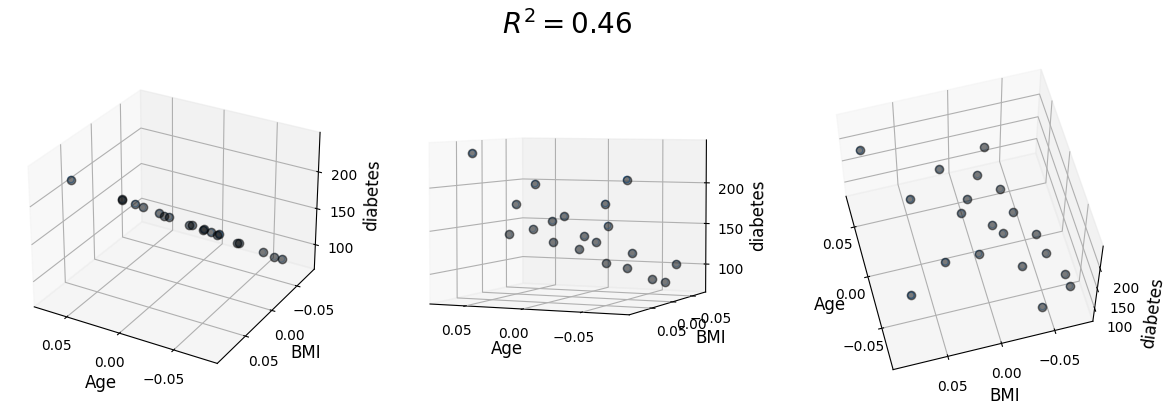

In [17]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, diabetes_y_pred, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x.flatten(), y.flatten(), diabetes_y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Age', fontsize=12)
    ax.set_ylabel('BMI', fontsize=12)
    ax.set_zlabel('diabetes', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2_score(diabetes_y_test, diabetes_y_pred), fontsize=20)

fig.tight_layout()
